# Evaluation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

from nltk.metrics import f_measure, precision, accuracy
import nltk
#nltk.download('punkt')

import torch
from transformers import AutoTokenizer, AutoModelForQuestionAnswering
from transformers import QuestionAnsweringPipeline

sns.set_palette(palette='Paired')
sns.set_style('whitegrid')

In [2]:
# Albert
albert_tokenizer = AutoTokenizer.from_pretrained("Firat/albert-base-v2-finetuned-squad")
albert = AutoModelForQuestionAnswering.from_pretrained("Firat/albert-base-v2-finetuned-squad")

In [3]:
# Roberta
roberta_tokenizer = AutoTokenizer.from_pretrained("Firat/roberta-base-finetuned-squad")
roberta = AutoModelForQuestionAnswering.from_pretrained("Firat/roberta-base-finetuned-squad")

In [ ]:
# Distilbert
distilbert_tokenizer = AutoTokenizer.from_pretrained("Firat/distilbert-base-uncased-finetuned-squad")
distilbert = AutoModelForQuestionAnswering.from_pretrained("Firat/distilbert-base-uncased-finetuned-squad")

In [ ]:
# Load Questions
data = pd.read_excel('question_collection.xlsx')
data.columns = [col.lower() for col in data.columns]
data.head(2)

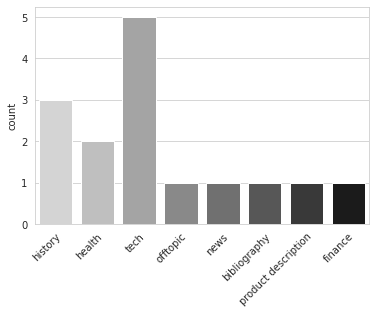

In [11]:
p = sns.countplot(x=data['topic'], palette=sns.color_palette('Greys', 10)[2:])
p.set_xticklabels(labels=p.get_xticklabels() , rotation=45, rotation_mode='anchor', ha='right')
p.set_xlabel('')
p.set_xticks(ticks=p.get_xticks(), rotation=5, fontsize=10)
plt.show()

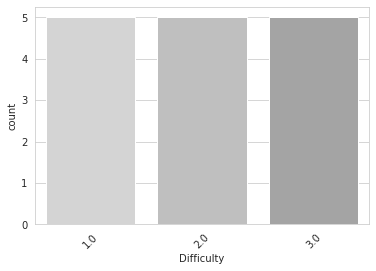

In [7]:
p = sns.countplot(x=data['difficulty (1-3)'], palette=sns.color_palette('Greys', 10)[2:])
p.set_xticklabels(labels=p.get_xticklabels() , rotation=45, rota)
p.set_xlabel('Difficulty')
plt.show()

In [14]:
text = data.loc[0, 'text']
q1 = data.loc[0, 'question 1']
q2 = data.loc[0, 'question 2']
q3 = data.loc[0, 'question 3']
print(text)
print(40*'=')
print(q1)
print(40*'=')
print(q2)
print(40*'=')
print(q3)

World War II or the Second World War, often abbreviated as WWII or WW2, was a global war that lasted from 1939 to 1945. It involved the vast majority of the world's countries—including all of the great powers—forming two opposing military alliances: the Allies and the Axis powers. In a total war directly involving more than 100 million personnel from more than 30 countries, the major participants threw their entire economic, industrial, and scientific capabilities behind the war effort, blurring the distinction between civilian and military resources. Aircraft played a major role in the conflict, enabling the strategic bombing of population centres and the only two uses of nuclear weapons in war. World War II was by far the deadliest conflict in human history; it resulted in 70 to 85 million fatalities, a majority being civilians. Tens of millions of people died due to genocides (including the Holocaust), starvation, massacres, and disease. In the wake of the Axis defeat, Germany and J

In [15]:
foo = np.array(roberta_tokenizer(q1, padding='max_length')['input_ids'])
print(foo[foo != 1].shape)
print(len(q1.split(' ')))

(10,)
7


Jedes Wort bildet ein Token mit Start und End-Token. Es werden auch Satzzeichen tokenisiert.

In [16]:
inputs = roberta_tokenizer(text, padding="max_length", truncation=True)
print(inputs)

{'input_ids': [0, 10988, 1771, 3082, 50, 5, 4665, 623, 1771, 6, 747, 40993, 1070, 25, 29001, 50, 15584, 176, 6, 21, 10, 720, 997, 14, 9200, 31, 28234, 7, 21123, 4, 85, 963, 5, 4714, 1647, 9, 5, 232, 18, 749, 578, 8529, 70, 9, 5, 372, 4361, 578, 11847, 80, 9375, 831, 22484, 35, 5, 37761, 8, 5, 34073, 4361, 4, 96, 10, 746, 997, 2024, 3329, 55, 87, 727, 153, 3775, 31, 55, 87, 389, 749, 6, 5, 538, 3597, 4021, 49, 1445, 776, 6, 2683, 6, 8, 6441, 5587, 639, 5, 997, 1351, 6, 3089, 16715, 5, 16192, 227, 8233, 8, 831, 1915, 4, 25221, 702, 10, 538, 774, 11, 5, 3050, 6, 10298, 5, 3461, 10183, 9, 1956, 7872, 8, 5, 129, 80, 2939, 9, 1748, 2398, 11, 997, 4, 623, 1771, 3082, 21, 30, 444, 5, 16751, 3050, 11, 1050, 750, 131, 24, 4596, 11, 1510, 7, 5663, 153, 16982, 6, 10, 1647, 145, 6321, 4, 29031, 9, 2535, 9, 82, 962, 528, 7, 12358, 1975, 4376, 36, 8529, 5, 13903, 238, 31536, 6, 39246, 6, 8, 2199, 4, 96, 5, 3874, 9, 5, 34073, 3002, 6, 1600, 8, 1429, 58, 9533, 6, 8, 997, 3474, 28406, 879, 1536, 58, 296

Das Dictionary besteht aus den encodeten ID's und aus den Attention Mask. Die Attention Mask bezieht sich eigentlich nur auf den Wortteil, welcher nicht gepadded wurde. Das Padding wurde beim Tokenizer  mit dem Token 1 implementiert..

In [17]:
print([(i, roberta_tokenizer.convert_ids_to_tokens(i)) for i in range(4)])

[(0, '<s>'), (1, '<pad>'), (2, '</s>'), (3, '<unk>')]


Die oberen Token stellen besondere Token dar wie start_token als 1, pad_token als 1, 2 als end_token und einen unbekannten Token mit der ID 3.

In [18]:
att = np.array(inputs['attention_mask'])
att

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [19]:
# Extraction of topk: topk=10
roberta_pipeline = QuestionAnsweringPipeline(model=roberta, tokenizer=roberta_tokenizer, top_k=2)

In [20]:
text_id = 3
print(data.loc[text_id, 'question 1'])
print(roberta_pipeline(question=data.loc[text_id, 'question 1'], context=data.loc[text_id, 'text']))
print(data.loc[text_id, 'answer 1'])

On who focuses the series?
[{'score': 0.9776242971420288, 'start': 22, 'end': 37, 'answer': 'Monkey D. Luffy'}, {'score': 0.014314273372292519, 'start': 22, 'end': 38, 'answer': 'Monkey D. Luffy,'}]
Monkey D. Ruffy


In [21]:
from nltk.tokenize import word_tokenize

class QAEvaluate(object):
    """
    THis class is for the evaluation of Question Answering System
    """
    
    def __init__(self, model, tokenizer, top_k=1, return_answer_only=True, 
                 metric='F1', evaluate_tokenized=True):
        """
        This class implements a wrapper method for different evaluations on QuestionAnswering models from 
        Huggingface.com
        
        arguments:
        ------------------
        model:              QuestionAnswering model of HuggingFace
        tokenizer:          Tokenizer to QA model
        top_K:              Amount of answers to be returned of model.
                            Default = 1
        return_answer_only: Boolean to indicate if only the answer should be returned.
                            If not True the model will return a dict with probability and Span
        metric:             Metric to chose for the evaluation 
                            Default = "F1"
        evaluate_tokenized: If the evaluation should be made for tokenized answers or not.
                            Default = True
        """
        self.model = model
        self.tokenizer = tokenizer
        self.pipeline = QuestionAnsweringPipeline(model=model, 
                                                  tokenizer=tokenizer, 
                                                  top_k=top_k)
        self.return_answer_only = return_answer_only
        self.metric = metric
        self.evaluate_tokenized = evaluate_tokenized
        
    def answer_all(self, texts: np.ndarray, questions: np.ndarray):
        """
        Answers all questions given with corresponding texts.
        
        arguments:
        -------------
        texts:        an array of texts with dim = 0
        questions:    An array of questions of dim = 1
                      Each row in this matrix should correspond with the ID of the text in the given 
                      input array:
                      [[q1, q2, q3], [q1, q2,q3]]
        returns:
        -------------
        answers:      A dictionary of answers
        
        """
        answers = {}
        # Answer all Questions
        with tqdm(total=len(texts)*len(questions[0]), desc='Answering Questions') as pbar:
            for i, text in enumerate(texts):
                answers[i] = {}
                for j, question in enumerate(questions[i]):
                    answer = self.answer_question(question=question, text=text)
                    answers[i][j] = answer
                    pbar.update(1)
        
        return answers
    
    def evaluate(self, texts: np.ndarray, questions: np.ndarray, reference_answers: np.ndarray):
        """
        Methods calls functions to evaluate a given model with text, question and reference inputs.
        
        arguments:
        -------------
        texts:                an array of texts with dim = 0
                              Example: [text1, text2]
        questions:            An array of questions of dim = 1
                              Each row in this matrix should correspond with the ID of the text in the given 
                              input array:
                              Example: [[q1, q2, q3], [q1, q2,q3]]
        reference_answers:    An array of correct answers to given questions. Same shapes and dimensions like
                              questions.
        
        returns:
        -------------
        scores:               An array of scores in shape reference_answers.shape
        """
        # Call function to answer all by system
        answers = self.answer_all(texts=texts, questions=questions) 
        
        # Evaluate all questions    
        # Prepare answers as array
        answers = self._convert_to_array(answers)
        scores = self._calculate_scores(reference=reference_answers, test=answers)
        
        return scores
    
    def answer_question(self, question: str, text: str):
        """
        Methods calls functions to evaluate a given model with text, question and reference inputs.
        
        arguments:
        -------------
        question:     A question given as string
        text:         A text given as string
                
        returns:
        -------------
        answers:      Dictionary consisting of given question and answer
        """
        # Return answer from model
        answer = self.pipeline(question=question, context=text)
        
        if self.return_answer_only:
            answer = answer['answer']
        
        return dict(question=question, answer=answer)

            
    @staticmethod
    def _convert_to_array(A):
        """
        Converts given dictionary to an Array
        """
        answers = []
        for i, text in A.items():
            question_answers = []
            for j, qa in text.items():
                question_answers.append(qa['answer'])
            answers.append(question_answers)
            
        return np.array(answers, dtype=str)
    
    def _calculate_scores(self, reference, test):
        """
        Used for the calculation of the scores for each question given the reference.
        """
        if self.metric == 'F1':
            metric_func = f_measure
        elif self.metric == 'precision':
            metric_func = precision
        else:
            raise Exception('Metric does not fitted supported Functions within this class: [F1, accuracy, precision]')
            
        scores = self.__calculate_metric(metric_func=metric_func, reference=reference, 
                                         test=test, tokenized=self.evaluate_tokenized)
        
        return scores
        
    @staticmethod
    def __calculate_metric(metric_func, reference, test, tokenized=True):
        """
        Calculates Scores
        """
        assert reference.shape == test.shape 
        
        scores = np.empty(shape=reference.shape)
        for i in tqdm(range(reference.shape[0]), desc='Calculating Scores'):
            for j in range(reference.shape[1]):
                if tokenized:
                    # Tokenize Words
                    t, ref = set(word_tokenize(str(test[i, j]))), set(word_tokenize(str(reference[i, j])))
                else:
                    t, ref = set([test[i, j]]), set([reference[i, j]])
                # Score
                score = metric_func(reference=ref, test=t)
                scores[i, j] = score
                
        return scores

In [22]:
evaluator = QAEvaluate(model=roberta, tokenizer=roberta_tokenizer)

In [23]:
data.loc[0, 'question 1']

'When took the second World War place?'

In [24]:
evaluator.answer_question(question=data.loc[0, 'question 1'], text=data.loc[0, 'text'])

{'question': 'When took the second World War place?', 'answer': '1945'}

In [19]:
select_n = 3
texts = data.loc[:select_n, 'text'].to_list()
questions = data.loc[:select_n, ['question 1', 'question 2', 'question 3']].to_numpy()
reference_answers = data.loc[:select_n, ['answer 1', 'answer 2', 'answer 3']].to_numpy()

In [20]:
questions_answers = evaluator.answer_all(texts=texts, questions=questions)
questions_answers[0]

Answering Questions:   0%|          | 0/12 [00:00<?, ?it/s]

{0: {'question': 'When took the second World War place?', 'answer': '1945'},
 1: {'question': 'How many personnel was involved?',
  'answer': 'more than 100 million'},
 2: {'question': 'Who were the majority of fatalities?',
  'answer': 'civilians'}}

----

In [68]:
texts = data.loc[:, 'text'].to_list()
questions = data.loc[:, ['question 1', 'question 2', 'question 3']].to_numpy()
reference_answers = data.loc[:, ['answer 1', 'answer 2', 'answer 3']].to_numpy()
print(questions.shape)

(15, 3)


## Evaluation F1: Tokenized

In [69]:
evaluator = QAEvaluate(model=roberta, tokenizer=roberta_tokenizer, top_k=1, 
                       return_answer_only=True, metric='F1', evaluate_tokenized=True)
roberta_scores = evaluator.evaluate(texts=texts, questions=questions, 
                            reference_answers=reference_answers)
print(roberta_scores.shape)

Answering Questions:   0%|          | 0/45 [00:00<?, ?it/s]

Calculating Scores:   0%|          | 0/15 [00:00<?, ?it/s]

(15, 3)


In [70]:
evaluator = QAEvaluate(model=distilbert, tokenizer=distilbert_tokenizer, top_k=1, 
                       return_answer_only=True, metric='F1', evaluate_tokenized=True)
distilbert_scores = evaluator.evaluate(texts=texts, questions=questions, 
                            reference_answers=reference_answers)
print(distilbert_scores.shape)

Answering Questions:   0%|          | 0/45 [00:00<?, ?it/s]

Calculating Scores:   0%|          | 0/15 [00:00<?, ?it/s]

(15, 3)


In [71]:
evaluator = QAEvaluate(model=albert, tokenizer=albert_tokenizer, top_k=1, 
                       return_answer_only=True, metric='F1', evaluate_tokenized=True)
albert_scores = evaluator.evaluate(texts=texts, questions=questions, 
                            reference_answers=reference_answers)
print(albert_scores.shape)

Answering Questions:   0%|          | 0/45 [00:00<?, ?it/s]

Calculating Scores:   0%|          | 0/15 [00:00<?, ?it/s]

(15, 3)


In [72]:
tmp = pd.DataFrame(np.concatenate([roberta_scores.reshape(-1,1), albert_scores.reshape(-1,1), distilbert_scores.reshape(-1,1)], axis=1), 
                   columns=['ROBERTA', 'ALBERT', 'DISTILBERT'])
difficulty = data['difficulty (1-3)'].to_numpy().reshape(-1,1)
difficulty = np.concatenate(3*[difficulty], axis=1)


tmp['difficulty'] = difficulty.flatten()
tmp.head(2)

,ROBERTA,ALBERT,DISTILBERT,difficulty
0,0.5,0.857143,1.0,1.0
1,1.0,1.000000,1.0,1.0


In [26]:
tmp = tmp.melt(id_vars='difficulty', var_name='model', value_name='F1')
tmp.head()

,difficulty,model,F1
0,1.0,ROBERTA,0.500000
1,1.0,ROBERTA,1.000000
2,1.0,ROBERTA,1.000000
3,3.0,ROBERTA,1.000000
4,3.0,ROBERTA,0.714286


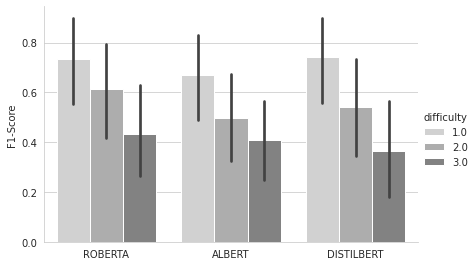

In [28]:
p = sns.catplot(x = 'model', y='F1', 
                hue = 'difficulty',data=tmp, 
                palette=sns.color_palette('Greys', 6)[1:5],
                kind='bar', aspect=1.5, height=4)
p.set_ylabels("F1-Score")
p.set_titles('F1-Scores per Question')
p.set_xlabels(' ')
plt.show()

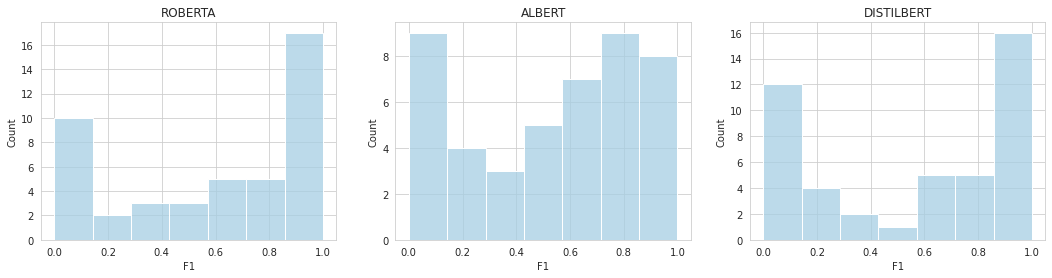

In [29]:
fig = plt.subplots(figsize=(18, 4))

plt.subplot(1,3,1)
p = sns.histplot(roberta_scores.flatten())
p.set_title('ROBERTA')
p.set_xlabel('F1')

plt.subplot(1,3,2)
p = sns.histplot(albert_scores.flatten())
p.set_title('ALBERT')
p.set_xlabel('F1')

plt.subplot(1,3,3)
p = sns.histplot(distilbert_scores.flatten())
p.set_title('DISTILBERT')
p.set_xlabel('F1')

plt.show()

## Evaluation F1: Untokenized

In [30]:
texts = data.loc[:, 'text'].to_list()
questions = data.loc[:, ['question 1', 'question 2', 'question 3']].to_numpy()
reference_answers = data.loc[:, ['answer 1', 'answer 2', 'answer 3']].to_numpy()
print(questions.shape)

(15, 3)


In [31]:
evaluator = QAEvaluate(model=roberta, tokenizer=roberta_tokenizer, top_k=1, 
                       return_answer_only=True, metric='F1', evaluate_tokenized=False)
roberta_scores = evaluator.evaluate(texts=texts, questions=questions, 
                            reference_answers=reference_answers)
print(roberta_scores.shape)

Answering Questions:   0%|          | 0/45 [00:00<?, ?it/s]

Calculating Scores:   0%|          | 0/15 [00:00<?, ?it/s]

(15, 3)


In [32]:
evaluator = QAEvaluate(model=distilbert, tokenizer=distilbert_tokenizer, top_k=1, 
                       return_answer_only=True, metric='F1', evaluate_tokenized=False)
distilbert_scores = evaluator.evaluate(texts=texts, questions=questions, 
                            reference_answers=reference_answers)
print(distilbert_scores.shape)

Answering Questions:   0%|          | 0/45 [00:00<?, ?it/s]

Calculating Scores:   0%|          | 0/15 [00:00<?, ?it/s]

(15, 3)


In [33]:
evaluator = QAEvaluate(model=albert, tokenizer=albert_tokenizer, top_k=1, 
                       return_answer_only=True, metric='F1', evaluate_tokenized=False)
albert_scores = evaluator.evaluate(texts=texts, questions=questions, 
                            reference_answers=reference_answers)
print(albert_scores.shape)

Answering Questions:   0%|          | 0/45 [00:00<?, ?it/s]

Calculating Scores:   0%|          | 0/15 [00:00<?, ?it/s]

(15, 3)


In [34]:
tmp = pd.DataFrame(np.concatenate([roberta_scores.reshape(-1,1), albert_scores.reshape(-1,1), distilbert_scores.reshape(-1,1)], axis=1), 
                   columns=['ROBERTA', 'ALBERT', 'DISTILBERT'])
difficulty = data['difficulty (1-3)'].to_numpy().reshape(-1,1)
difficulty = np.concatenate(3*[difficulty], axis=1)

tmp['difficulty'] = difficulty.flatten()
tmp.head(2)

,ROBERTA,ALBERT,DISTILBERT,difficulty
0,0.0,0.0,1.0,1.0
1,1.0,1.0,1.0,1.0


In [35]:
tmp = tmp.melt(id_vars='difficulty', var_name='model', value_name='F1')
tmp.head()

,difficulty,model,F1
0,1.0,ROBERTA,0.0
1,1.0,ROBERTA,1.0
2,1.0,ROBERTA,1.0
3,3.0,ROBERTA,1.0
4,3.0,ROBERTA,0.0


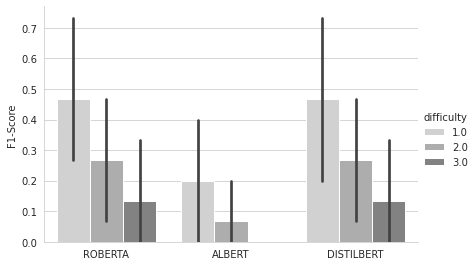

In [36]:
p = sns.catplot(x = 'model', y='F1', 
                hue = 'difficulty',data=tmp, 
                palette=sns.color_palette('Greys', 6)[1:5],
                kind='bar', aspect=1.5, height=4)
p.set_ylabels("F1-Score")
p.set_titles('F1-Scores per Question')
p.set_xlabels(' ')
plt.show()

__Untokenized__

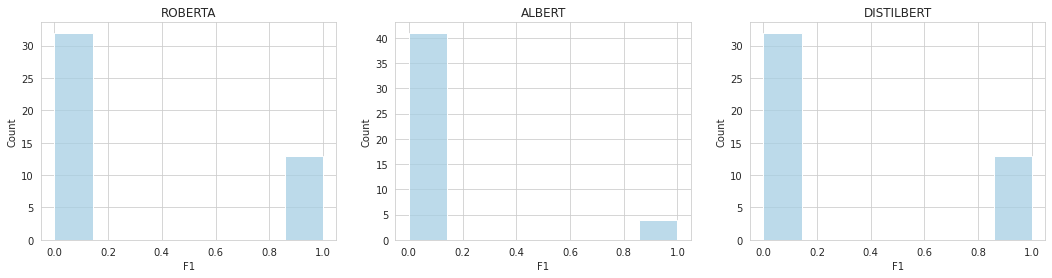

In [37]:
fig = plt.subplots(figsize=(18, 4))

plt.subplot(1,3,1)
p = sns.histplot(roberta_scores.flatten())
p.set_title('ROBERTA')
p.set_xlabel('F1')

plt.subplot(1,3,2)
p = sns.histplot(albert_scores.flatten())
p.set_title('ALBERT')
p.set_xlabel('F1')

plt.subplot(1,3,3)
p = sns.histplot(distilbert_scores.flatten())
p.set_title('DISTILBERT')
p.set_xlabel('F1')

plt.show()

## Investigation of Probabilties per MOdel

### Probabilty of Answers

In [38]:
texts = data.loc[:, 'text'].to_list()
questions = data.loc[:, ['question 1', 'question 2', 'question 3']].to_numpy()
reference_answers = data.loc[:, ['answer 1', 'answer 2', 'answer 3']].to_numpy()
print(questions.shape)

(15, 3)


In [39]:
evaluator = QAEvaluate(model=roberta, tokenizer=roberta_tokenizer, top_k=1, 
                       return_answer_only=False, metric='F1', evaluate_tokenized=True)
roberta_answers = evaluator.answer_all(texts=texts, questions=questions)

Answering Questions:   0%|          | 0/45 [00:00<?, ?it/s]

In [40]:
evaluator = QAEvaluate(model=distilbert, tokenizer=distilbert_tokenizer, top_k=1, 
                       return_answer_only=False, metric='F1', evaluate_tokenized=True)
distilbert_answers = evaluator.answer_all(texts=texts, questions=questions)

Answering Questions:   0%|          | 0/45 [00:00<?, ?it/s]

In [41]:
evaluator = QAEvaluate(model=albert, tokenizer=albert_tokenizer, top_k=1, 
                       return_answer_only=False, metric='F1', evaluate_tokenized=True)
albert_answers = evaluator.answer_all(texts=texts, questions=questions)

Answering Questions:   0%|          | 0/45 [00:00<?, ?it/s]

In [42]:
albert_answers[0]

{0: {'question': 'When took the second World War place?',
  'answer': {'score': 0.6823691129684448,
   'start': 106,
   'end': 119,
   'answer': '1939 to 1945.'}},
 1: {'question': 'How many personnel was involved?',
  'answer': {'score': 0.4476654827594757,
   'start': 316,
   'end': 337,
   'answer': 'more than 100 million'}},
 2: {'question': 'Who were the majority of fatalities?',
  'answer': {'score': 0.8735024333000183,
   'start': 832,
   'end': 842,
   'answer': 'civilians.'}}}

In [43]:
tmp = data.loc[:, ['id', 'difficulty (1-3)', 'answer 1', 'answer 2', 'answer 3']]
tmp = tmp.melt(id_vars=['id', 'difficulty (1-3)']).sort_values(by=['id', 'variable']).reset_index(drop=True)
tmp.columns = ['text_id', 'difficulty (1-3)', 'answer_id', 'answer']
tmp.head(2)

,text_id,difficulty (1-3),answer_id,answer
0,1.0,1.0,answer 1,1939 to 1945
1,1.0,1.0,answer 2,more than 100 million


In [44]:
def extract_probability(answers: dict):
    probs = []
    for idx, text in answers.items():
        for qid, items in text.items():
            probs.append(items['answer']['score'])
            
    return probs

In [45]:
tmp['Albert'] = extract_probability(albert_answers)
tmp['Roberta'] = extract_probability(roberta_answers)
tmp['Distilbert'] = extract_probability(distilbert_answers)
tmp.head(5)

,text_id,difficulty (1-3),answer_id,answer,Albert,Roberta,Distilbert
0,1.0,1.0,answer 1,1939 to 1945,0.682369,0.440837,0.420929
1,1.0,1.0,answer 2,more than 100 million,0.447665,0.450952,0.325835
2,1.0,1.0,answer 3,civilians,0.873502,0.952703,0.855431
3,2.0,3.0,answer 1,healthcare,0.982662,0.992195,0.957916
4,2.0,3.0,answer 2,occupational therapists and occupational thera...,0.569883,0.573797,0.589979


### Plotting all Probabilty Values

In [106]:
selection = tmp[['difficulty (1-3)', 'Albert', 'Roberta', 'Distilbert']]
selection = selection.melt(id_vars=['difficulty (1-3)'], var_name=['model'], 
                           value_name='probs')
selection.columns = ['difficulty', 'model', 'probs']
selection.head(2)

,difficulty,model,probs
0,1.0,Albert,0.682369
1,1.0,Albert,0.447665


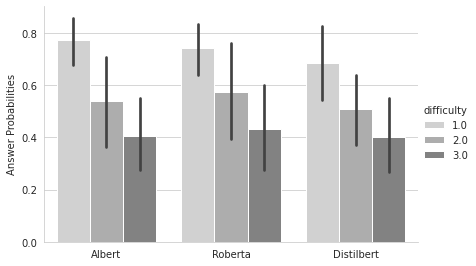

In [107]:
p = sns.catplot(x = 'model', y='probs', 
                hue = 'difficulty',data=selection, 
                palette=sns.color_palette('Greys', 6)[1:5],
                kind='bar', aspect=1.5, height=4)
p.set_ylabels("Answer Probabilities")
p.set_xlabels('')
plt.show()

- Desto Schwerer Das Niveau der Fragen und Texte, desto tiefer auch die Probabilities die von den MOdellen für die Top Answer zurückgegeben werden.


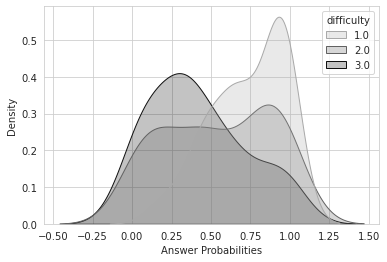

In [108]:
cmap = sns.color_palette('Greys', 15)
c1, c2, c3 = cmap[6], cmap[10], cmap[14]
p = sns.kdeplot(x = 'probs', shade=True,
                hue = 'difficulty', data=selection, 
                palette=[c1, c2, c3])
p.set_xlabel('Answer Probabilities')
plt.show()

Plot zeigt klar dass die Probabilities der einzelnen klassen stark voneinander abweichen.

### Plotting all Trick Questions Probs

In [109]:
tmp['is_trick'] = tmp['answer'] == 'None'

In [110]:
tmp.head()

,text_id,difficulty (1-3),answer_id,answer,Albert,Roberta,Distilbert,is_trick,is_correct
0,1.0,1.0,answer 1,1939 to 1945,0.682369,0.440837,0.420929,False,0.0
1,1.0,1.0,answer 2,more than 100 million,0.447665,0.450952,0.325835,False,1.0
2,1.0,1.0,answer 3,civilians,0.873502,0.952703,0.855431,False,1.0
3,2.0,3.0,answer 1,healthcare,0.982662,0.992195,0.957916,False,1.0
4,2.0,3.0,answer 2,occupational therapists and occupational thera...,0.569883,0.573797,0.589979,False,0.0


In [111]:
# Trick Question 1
select = tmp[['Albert', 'Roberta', 'Distilbert', 'is_trick']]
select = select.melt(id_vars='is_trick', var_name='model')
select.head(2)

,is_trick,model,value
0,False,Albert,0.682369
1,False,Albert,0.447665


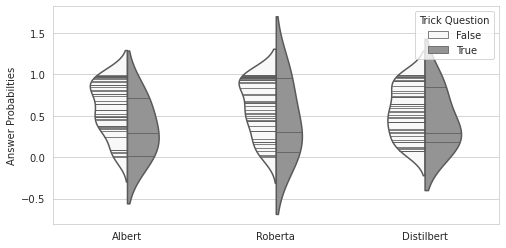

In [117]:
cmap = sns.color_palette('Greys', 100)
c1, c2 = cmap[5], cmap[50]

fig = plt.subplots(figsize=(8, 4))
p = sns.violinplot(data=select, x='model', y='value', hue='is_trick', 
               split=True, inner='stick', width=.5, palette=[c1, c2])
p.set_xlabel('')
p.set_ylabel('Answer Probabilties')
p.legend(title='Trick Question', loc='upper right')

plt.show()

In [54]:
tmp[tmp['is_trick']]

,text_id,difficulty (1-3),answer_id,answer,Albert,Roberta,Distilbert,is_trick
8,3.0,2.0,answer 3,None,0.011551,0.058431,0.180430,True
42,15.0,3.0,answer 1,None,0.716140,0.956289,0.851745,True
43,15.0,3.0,answer 2,None,0.289408,0.307396,0.288585,True


In [62]:
evaluator.answer_question(text=data.loc[data['id']==15, 'text'].values[0], question=data.loc[data['id']==15, 'question 1'].values[0])

{'question': 'When receives the Pfizer-BioNTech COVID19 vaccine full approval for children?',
 'answer': {'score': 0.7161400318145752,
  'start': 139,
  'end': 151,
  'answer': 'August 2021.'}}

In [58]:
data.loc[data['id']==15, 'question 1'].values

array(['When receives the Pfizer-BioNTech COVID19 vaccine full approval for children?'],
      dtype=object)

In [59]:
data.loc[data['id']==15, 'text'].values

array(['Pfizer-BioNTech was the first COVID-19 vaccine to receive full Food and Drug Administration (FDA) approval for people ages 16 and older in August 2021. It was also the first COVID-19 vaccine to receive FDA Emergency Use Authorization (EUA) back in December 2020, after the company reported its vaccine was highly effective at preventing symptomatic disease. This is a messenger RNA (mRNA) vaccine, which uses a relatively new technology. It must be stored in freezer-level temperatures, which can make it more difficult to distribute than some other vaccines.\nDosage: Two shots, 21 days apart; fully effective two weeks after second shot. Single-shot booster doses can be administered to those who are eligible at least five months after completion of the primary doses. Because Pfizer-BioNTech says its data shows a smaller dose produces a strong immune response in children, the two 10-microgram doses for children ages 5-11 is smaller than the two 30-microgram doses given to teens and ad

Text(0, 0.5, 'Answer Probabilties')

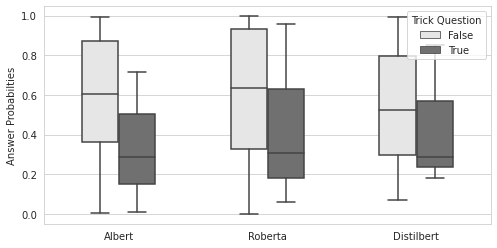

In [53]:
cmap = sns.color_palette('Greys', 10)
c1, c2 = cmap[1], cmap[6]
fig = plt.subplots(figsize=(8, 4))

p = sns.boxplot(data=select, x='model', y='value', hue='is_trick' ,
               width=.5, palette=[c1, c2])
p.set_xlabel('')
p.legend(title='Trick Question', loc='upper right')
p.set_ylabel('Answer Probabilties')

In [953]:
select[select['is_trick']]

,is_trick,model,value
8,True,Albert,0.011551
42,True,Albert,0.716140
43,True,Albert,0.289408
53,True,Roberta,0.058431
87,True,Roberta,0.956289
88,True,Roberta,0.307396
98,True,Distilbert,0.180430
132,True,Distilbert,0.851745
133,True,Distilbert,0.288585


In [67]:
evaluator_roberta = QAEvaluate(model=roberta, tokenizer=roberta_tokenizer, return_answer_only=False)
evaluator_distilbet = QAEvaluate(model=distilbert, tokenizer=distilbert_tokenizer, return_answer_only=False)
evaluator_albert = QAEvaluate(model=albert, tokenizer=albert_tokenizer, return_answer_only=False)

In [70]:
questions[0][0]

'When took the second World War place?'

In [71]:
text

"World War II or the Second World War, often abbreviated as WWII or WW2, was a global war that lasted from 1939 to 1945. It involved the vast majority of the world's countries—including all of the great powers—forming two opposing military alliances: the Allies and the Axis powers. In a total war directly involving more than 100 million personnel from more than 30 countries, the major participants threw their entire economic, industrial, and scientific capabilities behind the war effort, blurring the distinction between civilian and military resources. Aircraft played a major role in the conflict, enabling the strategic bombing of population centres and the only two uses of nuclear weapons in war. World War II was by far the deadliest conflict in human history; it resulted in 70 to 85 million fatalities, a majority being civilians. Tens of millions of people died due to genocides (including the Holocaust), starvation, massacres, and disease. In the wake of the Axis defeat, Germany and 

In [72]:
evaluator_roberta.answer_question(questions[2][0], text)

{'question': 'What can a raw input may be?',
 'answer': {'score': 0.0072106565348804,
  'start': 419,
  'end': 468,
  'answer': 'economic, industrial, and scientific capabilities'}}

In [73]:
evaluator_albert.answer_question(questions[2][0], text)

{'question': 'What can a raw input may be?',
 'answer': {'score': 0.061296965926885605,
  'start': 525,
  'end': 557,
  'answer': 'civilian and military resources.'}}

In [74]:
evaluator_distilbet.answer_question(questions[2][0], text)

{'question': 'What can a raw input may be?',
 'answer': {'score': 0.04475134238600731,
  'start': 400,
  'end': 490,
  'answer': 'threw their entire economic, industrial, and scientific capabilities behind the war effort'}}

## Evaluation of Probabilities for Right and Wrong Questions

- Probability regarding to Scores (right or wrong) (Exact Match)

In [120]:
tmp.head(2)

,text_id,difficulty (1-3),answer_id,answer,Albert,Roberta,Distilbert,is_trick,is_correct
0,1.0,1.0,answer 1,1939 to 1945,0.682369,0.440837,0.420929,False,0.0
1,1.0,1.0,answer 2,more than 100 million,0.447665,0.450952,0.325835,False,1.0


In [121]:
roberta_scores.flatten()

array([0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [122]:
tmp['is_correct'] = roberta_scores.flatten()

In [123]:
tmp.head(2)

,text_id,difficulty (1-3),answer_id,answer,Albert,Roberta,Distilbert,is_trick,is_correct
0,1.0,1.0,answer 1,1939 to 1945,0.682369,0.440837,0.420929,False,0.0
1,1.0,1.0,answer 2,more than 100 million,0.447665,0.450952,0.325835,False,1.0


In [124]:
select = tmp[['Albert', 'Roberta', 'Distilbert', 'is_correct']].melt(id_vars='is_correct', var_name='model', value_name='probability')
select['is_correct'] = select['is_correct'].replace({0.0:'False', 1.0:'True'})
select.head(2)

,is_correct,model,probability
0,False,Albert,0.682369
1,True,Albert,0.447665


Text(0, 0.5, 'Answer Probabilties')

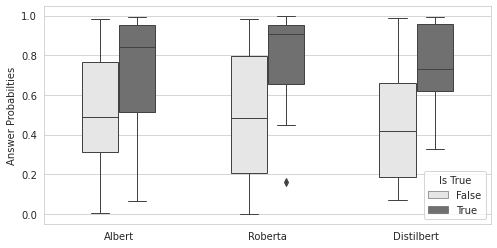

In [129]:
cmap = sns.color_palette('Greys', 10)
c1, c2 = cmap[1], cmap[6]
fig = plt.subplots(figsize=(8, 4))

p = sns.boxplot(data=select, x='model', y='probability', hue='is_correct' ,
               width=.5, palette=[c1, c2], linewidth=1)
p.set_xlabel('')
p.legend(title='Is True', loc='lower right')
p.set_ylabel('Answer Probabilties')

## Listed Answers

In [122]:
t = data.loc[9, 'text']
t

'With worldwide unique measuring systems the Swiss Institute for Forest, Snow and Landscapes (WSL) is a pioneer when it comes to research of bedload transport in flowing waters. With their systems, they are able to perform real-time bedload measurements, which results in recorded measuring signals since 2018. According to the measurements, data exists of three measurement systems: Miniplate Accelorometer (MPA), Square Pipe System (SPG) and Swiss Plate Geophones (SPS). The goal is to apply these systems in field locations, where the measurements can help to provide risk indicators for hazardous bedload transports. The measurement systems have been used in a lab environment to conduct controlled bedload transports measurements. In the process, different sizes of grains between 5mm-170mm were passed through. To estimate the risks and the bedload at status quo, they are aiming for a machine learning model, which predicts the sizes of the passed grains during bedload transport.'

In [123]:
q = data.loc[9, 'question 3']
q

'What are the names of the three measuring systems?'

In [57]:
evaluator_roberta = QAEvaluate(model=roberta, tokenizer=roberta_tokenizer, top_k=10, 
                       return_answer_only=False)
evaluator_albert = QAEvaluate(model=albert, tokenizer=albert_tokenizer, top_k=10, 
                       return_answer_only=False)
evaluator_distilbert = QAEvaluate(model=distilbert, tokenizer=distilbert_tokenizer, top_k=10, 
                       return_answer_only=False)

In [58]:
evaluator_roberta.answer_question(question=q, text=t)

{'question': 'What are the names of the three measuring systems?',
 'answer': [{'score': 0.0005563362501561642,
   'start': 383,
   'end': 413,
   'answer': 'Miniplate Accelorometer (MPA),'},
  {'score': 0.0004799406451638788,
   'start': 383,
   'end': 432,
   'answer': 'Miniplate Accelorometer (MPA), Square Pipe System'},
  {'score': 0.00022441688633989543,
   'start': 383,
   'end': 406,
   'answer': 'Miniplate Accelorometer'},
  {'score': 0.00015485378389712423,
   'start': 443,
   'end': 471,
   'answer': 'Swiss Plate Geophones (SPS).'},
  {'score': 8.85548724909313e-05,
   'start': 383,
   'end': 434,
   'answer': 'Miniplate Accelorometer (MPA), Square Pipe System ('},
  {'score': 3.5404878872213885e-05,
   'start': 383,
   'end': 437,
   'answer': 'Miniplate Accelorometer (MPA), Square Pipe System (SPG'},
  {'score': 3.133116479148157e-05, 'start': 469, 'end': 471, 'answer': ').'},
  {'score': 2.99151743092807e-05,
   'start': 383,
   'end': 420,
   'answer': 'Miniplate Acceloro

In [59]:
evaluator_albert.answer_question(question=q, text=t)

{'question': 'What are the names of the three measuring systems?',
 'answer': [{'score': 0.0039689019322395325,
   'start': 383,
   'end': 432,
   'answer': 'Miniplate Accelorometer (MPA), Square Pipe System'},
  {'score': 0.0027008510660380125,
   'start': 383,
   'end': 413,
   'answer': 'Miniplate Accelorometer (MPA),'},
  {'score': 0.002160422271117568,
   'start': 383,
   'end': 406,
   'answer': 'Miniplate Accelorometer'},
  {'score': 0.0004601622640620917,
   'start': 443,
   'end': 471,
   'answer': 'Swiss Plate Geophones (SPS).'},
  {'score': 0.00035878526978194714,
   'start': 383,
   'end': 413,
   'answer': 'Miniplate Accelorometer (MPA),'},
  {'score': 0.000301069492707029,
   'start': 383,
   'end': 425,
   'answer': 'Miniplate Accelorometer (MPA), Square Pipe'},
  {'score': 0.00011672845721477643,
   'start': 383,
   'end': 392,
   'answer': 'Miniplate'},
  {'score': 0.00010951849981211126,
   'start': 443,
   'end': 464,
   'answer': 'Swiss Plate Geophones'},
  {'score'

In [60]:
evaluator_distilbert.answer_question(question=q, text=t)

{'question': 'What are the names of the three measuring systems?',
 'answer': [{'score': 0.07973705977201462,
   'start': 383,
   'end': 432,
   'answer': 'Miniplate Accelorometer (MPA), Square Pipe System'},
  {'score': 0.04566909745335579,
   'start': 383,
   'end': 412,
   'answer': 'Miniplate Accelorometer (MPA)'},
  {'score': 0.031063061207532883,
   'start': 383,
   'end': 406,
   'answer': 'Miniplate Accelorometer'},
  {'score': 0.03046952188014984,
   'start': 443,
   'end': 470,
   'answer': 'Swiss Plate Geophones (SPS)'},
  {'score': 0.0032222166191786528,
   'start': 443,
   'end': 464,
   'answer': 'Swiss Plate Geophones'},
  {'score': 0.0020469932351261377,
   'start': 383,
   'end': 411,
   'answer': 'Miniplate Accelorometer (MPA'},
  {'score': 0.0015689675929024816,
   'start': 414,
   'end': 438,
   'answer': 'Square Pipe System (SPG)'},
  {'score': 0.0013483588118106127,
   'start': 414,
   'end': 432,
   'answer': 'Square Pipe System'},
  {'score': 0.00105791853275150

## Probabilities vs. F1 Scores

In [190]:
evaluator = QAEvaluate(model=roberta, tokenizer=roberta_tokenizer, top_k=1, 
                       return_answer_only=True, metric='F1', evaluate_tokenized=True)
scores = evaluator.evaluate(texts=texts, questions=questions, 
                            reference_answers=reference_answers)
evaluator = QAEvaluate(model=roberta, tokenizer=roberta_tokenizer, top_k=1, 
                       return_answer_only=False, metric='F1', evaluate_tokenized=True)
probs = evaluator.answer_all(texts=texts, questions=questions)

Answering Questions:   0%|          | 0/45 [00:00<?, ?it/s]

Calculating Scores:   0%|          | 0/15 [00:00<?, ?it/s]

Answering Questions:   0%|          | 0/45 [00:00<?, ?it/s]

In [191]:
probs = [[probs[i][0]['answer']['score'], probs[i][1]['answer']['score'], probs[i][2]['answer']['score']] 
 for i in list(probs.keys())]

In [192]:
probs = np.array(probs)

In [193]:
tmp = pd.DataFrame(data=np.concatenate([probs.reshape(-1,1), scores.reshape(-1,1)], axis=1), columns=['probabilities', 'f1'])
tmp['model'] = 'Roberta'

In [194]:
evaluator = QAEvaluate(model=albert, tokenizer=albert_tokenizer, top_k=1, 
                       return_answer_only=True, metric='F1', evaluate_tokenized=True)
scores = evaluator.evaluate(texts=texts, questions=questions, 
                            reference_answers=reference_answers)
evaluator = QAEvaluate(model=albert, tokenizer=albert_tokenizer, top_k=1, 
                       return_answer_only=False, metric='F1', evaluate_tokenized=True)
probs = evaluator.answer_all(texts=texts, questions=questions)

Answering Questions:   0%|          | 0/45 [00:00<?, ?it/s]

Calculating Scores:   0%|          | 0/15 [00:00<?, ?it/s]

Answering Questions:   0%|          | 0/45 [00:00<?, ?it/s]

In [195]:
probs = [[probs[i][0]['answer']['score'], probs[i][1]['answer']['score'], probs[i][2]['answer']['score']] 
 for i in list(probs.keys())]

In [196]:
probs = np.array(probs)

In [197]:
tmp_ = pd.DataFrame(data=np.concatenate([probs.reshape(-1,1), scores.reshape(-1,1)], axis=1), columns=['probabilities', 'f1'])
tmp_['model'] = 'Albert'
tmp = pd.concat([tmp, tmp_], axis=0)

In [198]:
evaluator = QAEvaluate(model=distilbert, tokenizer=distilbert_tokenizer, top_k=1, 
                       return_answer_only=True, metric='F1', evaluate_tokenized=True)
scores = evaluator.evaluate(texts=texts, questions=questions, 
                            reference_answers=reference_answers)
evaluator = QAEvaluate(model=distilbert, tokenizer=distilbert_tokenizer, top_k=1, 
                       return_answer_only=False, metric='F1', evaluate_tokenized=True)
probs = evaluator.answer_all(texts=texts, questions=questions)

Answering Questions:   0%|          | 0/45 [00:00<?, ?it/s]

Calculating Scores:   0%|          | 0/15 [00:00<?, ?it/s]

Answering Questions:   0%|          | 0/45 [00:00<?, ?it/s]

In [199]:
probs = [[probs[i][0]['answer']['score'], probs[i][1]['answer']['score'], probs[i][2]['answer']['score']] 
 for i in list(probs.keys())]

In [200]:
probs = np.array(probs)

In [201]:
tmp_ = pd.DataFrame(data=np.concatenate([probs.reshape(-1,1), scores.reshape(-1,1)], axis=1), columns=['probabilities', 'f1'])
tmp_['model'] = 'Distilbert'
tmp = pd.concat([tmp, tmp_], axis=0)

In [202]:
tmp.head(5)

,probabilities,f1,model
0,0.440837,0.500000,Roberta
1,0.450952,1.000000,Roberta
2,0.952703,1.000000,Roberta
3,0.992195,1.000000,Roberta
4,0.573797,0.714286,Roberta


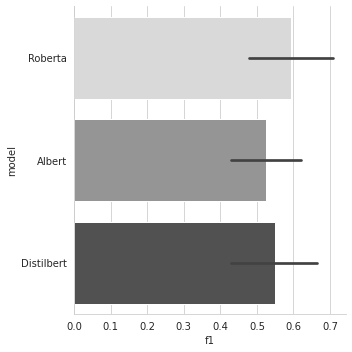

In [203]:
c1, c2, c3 = cmap[6], cmap[10], cmap[14]
p = sns.catplot(x = 'f1', y = 'model', data=tmp, palette='Greys', kind='bar')
plt.show()

0     0.500000
1     1.000000
2     1.000000
3     1.000000
4     0.714286
        ...   
40    0.000000
41    0.044944
42    0.000000
43    0.000000
44    0.631579
Name: f1, Length: 135, dtype: float64

<AxesSubplot:xlabel='probabilities', ylabel='f1'>

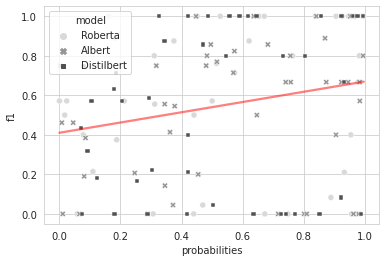

In [248]:
sns.scatterplot(data=tmp, x='probabilities', y='f1', hue='model', style='model', palette='Greys')
sns.regplot(data=tmp, x='probabilities', y='f1', scatter=False, color='red', 
            line_kws=dict(alpha=.5), ci=False)

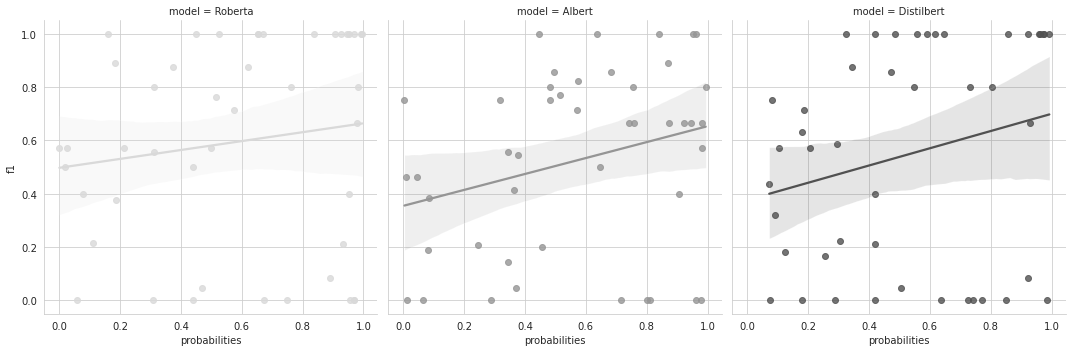

In [246]:
sns.lmplot(data=tmp, x='probabilities', y='f1', hue='model', col='model', palette='Greys')